Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [3]:
library(tidymodels)
library(tidyverse)
library(readr)


The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [59]:
diabetes = read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [8]:
glimpse(diabetes_train)



Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 5, 10, 4, 1, 3, 8, 5, 3, 10, 4, 11, 3, 7, …
$ Glucose                  <dbl> 85, 116, 115, 110, 103, 126, 99, 109, 88, 122…
$ BloodPressure            <dbl> 66, 74, 0, 92, 30, 88, 84, 75, 58, 78, 60, 76…
$ SkinThickness            <dbl> 29, 0, 0, 0, 38, 41, 0, 26, 11, 31, 33, 0, 25…
$ Insulin                  <dbl> 0, 0, 0, 0, 83, 235, 0, 0, 54, 0, 192, 0, 70,…
$ BMI                      <dbl> 26.6, 25.6, 35.3, 37.6, 43.3, 39.3, 35.4, 36.…
$ DiabetesPedigreeFunction <dbl> 0.351, 0.201, 0.134, 0.191, 0.183, 0.704, 0.3…
$ Age                      <dbl> 31, 30, 29, 30, 33, 27, 50, 60, 22, 45, 33, 3…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓ Which variable is suitable as the "outcome" in a logistic regression model?

**Answer: Outcome. Becase outcome we are predicting whether a person is going to have diabetes or not**

❓ Navigate to [Kaggle page](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     |  Plasma glucose concentration a 2 hours in an oral glucose tolerance test           |
| BMI         |   Body mass index (weight in kg/(height in m)^2)          |

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

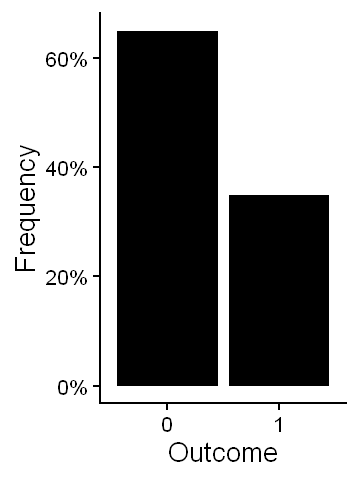

In [29]:

options(repr.plot.width=3, repr.plot.height=4)
ggplot(diabetes_train, aes(x=Outcome, fill=Outcome))+
stat_count(aes(y=after_stat(prop), group=1), fill='black') +
scale_y_continuous(label=scales::percent_format()) + #make y to label percentage
theme_classic(base_size = 16)+
labs(y='Frequency')

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:NO, We have far more 0 than 1.**

Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [53]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,85.0
0,BMI,26.6
0,Glucose,116.0
0,BMI,25.6
0,Glucose,115.0
0,BMI,35.3


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

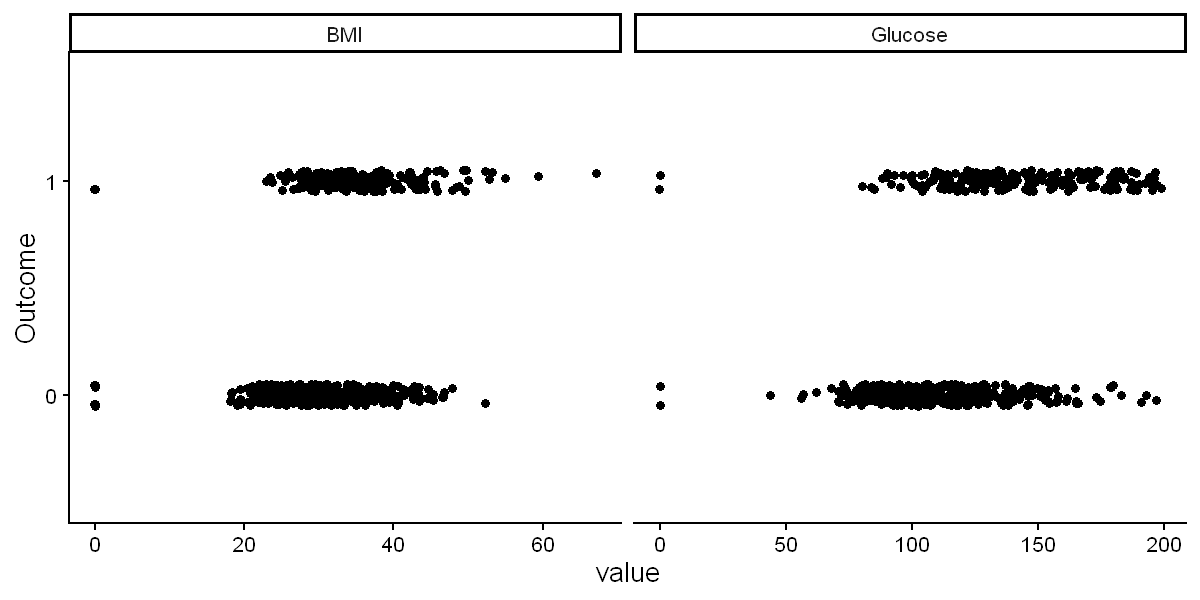

In [44]:
options(repr.plot.width=10, repr.plot.height=5)
ggplot(plot_df, aes(x=value,y=Outcome))+
geom_jitter(height=0.05)+
facet_wrap(~name, ncol=2, scales='free_x',)+
theme_classic(base_size=16)


❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer: The 2 columns of plot share the same x axis(0-200) which is not appropriate as BMI and Glucose has very different value range**

In [60]:
# Some 0 value noticed in the set which don't make sense.
dim(diabetes)
diabetes=diabetes|>filter(BMI>0)|>filter(Glucose>0)
dim(diabetes)

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)
dim(diabetes_train)
dim(diabetes_test)

[1] 768   9

[1] 752   9

[1] 564   9

[1] 188   9

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [61]:
mod=logistic_reg() |> set_engine("glm")

mod_fit = mod |> fit(Outcome~BMI + Glucose, diabetes_train)



In [ ]:
mod = logistic_reg() |> set_engine('glm')

mod_fit = mod |> fit(species ~ bill_length_mm, penguins2)

predict(mod_fit, penguins2, type="prob") |>  # have to ask for "prob" values otherwise we get class prediction
    bind_cols(penguins2) |>
ggplot(aes(y = species_numeric, x = bill_length_mm, color = species)) +
    geom_point(position = position_jitter(height = 0.05, width = 0)) +
    geom_line(aes(y = .pred_Gentoo), color = 'steelblue', linewidth = 1.2)  # use .pred_Gentoo instead of .pred



Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabetes_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [63]:
diabetes_test_wPred= augment(mod_fit, diabetes_test)
head(diabetes_test_wPred)

.pred_class,.pred_0,.pred_1,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0.3336414,0.6663586,8,183,64,0,0,23.3,0.672,32,1
1,0.4330022,0.5669978,5,166,72,19,175,25.8,0.587,51,1
0,0.6613813,0.3386187,1,103,30,38,83,43.3,0.183,33,0
0,0.8042950,0.1957050,8,99,84,0,0,35.4,0.388,50,0
0,0.7648337,0.2351663,9,119,80,35,0,29.0,0.263,29,1
0,0.7645303,0.2354697,10,122,78,31,0,27.6,0.512,45,0


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [65]:
diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)

diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 113  30
         1   9  36

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer: 45 people had diabetes in the test data( I filterd some people with 0 BMI or Glucose).
            36 out 45 was predicted to have diabetes.
            30 out of 66 individuals predicted to have diabetes did not have diabetes.**